# Reading from the **movie_reviews.csv** file
#### Note: The movie_reviews.csv still needs to be merged with movie_reviews_2, located in Resources/movie_reviews_2

In [2]:
import pandas as pd
import requests

movie_df = pd.read_csv('../Resources/movie_reviews.csv')
movie_df.head()

,adult,backdrop_path,genre_ids,id,original_language,original_title,overview,popularity,poster_path,release_date,title,video,vote_average,vote_count,reviews
0,False,/xOMo8BRK7PfcJv9JCnx7s5hj0PX.jpg,"[878, 12]",693134,en,Dune: Part Two,Follow the mythic journey of Paul Atreides as ...,4534.956,/1pdfLvkbY9ohJlCjQH2CZjjYVvJ.jpg,2024-02-27,Dune: Part Two,False,8.311,2707,FULL SPOILER-FREE REVIEW @ https://talkingfilm...
1,False,/1XDDXPXGiI8id7MrUxK36ke7gkX.jpg,"[16, 28, 12, 35, 10751]",1011985,en,Kung Fu Panda 4,Po is gearing up to become the spiritual leade...,3214.314,/f7QBvIzoWSJw3jWPGnZBc5vwQ0l.jpg,2024-03-02,Kung Fu Panda 4,False,7.066,897,_Kung Fu Panda 4_ isn’t the best _Kung Fu Pand...
2,False,/j3Z3XktmWB1VhsS8iXNcrR86PXi.jpg,"[28, 878, 12, 14]",823464,en,Godzilla x Kong: The New Empire,"Following their explosive showdown, Godzilla a...",2297.340,/tMefBSflR6PGQLv7WvFPpKLZkyk.jpg,2024-03-27,Godzilla x Kong: The New Empire,False,6.700,575,FULL SPOILER-FREE REVIEW @ https://fandomwire....
3,False,/oe7mWkvYhK4PLRNAVSvonzyUXNy.jpg,"[28, 53]",359410,en,Road House,Ex-UFC fighter Dalton takes a job as a bouncer...,1134.726,/bXi6IQiQDHD00JFio5ZSZOeRSBh.jpg,2024-03-08,Road House,False,7.066,1379,Very poor scenario and the story just does not...
4,False,/pwGmXVKUgKN13psUjlhC9zBcq1o.jpg,"[28, 14]",634492,en,Madame Web,"Forced to confront revelations about her past,...",921.140,/rULWuutDcN5NvtiZi4FRPzRYWSh.jpg,2024-02-14,Madame Web,False,5.676,1046,We start off with an heavily pregnant woman de...


In [3]:
movie_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4444 entries, 0 to 4443
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   adult              4444 non-null   bool   
 1   backdrop_path      4444 non-null   object 
 2   genre_ids          4444 non-null   object 
 3   id                 4444 non-null   int64  
 4   original_language  4444 non-null   object 
 5   original_title     4444 non-null   object 
 6   overview           4444 non-null   object 
 7   popularity         4444 non-null   float64
 8   poster_path        4444 non-null   object 
 9   release_date       4444 non-null   object 
 10  title              4444 non-null   object 
 11  video              4444 non-null   bool   
 12  vote_average       4444 non-null   float64
 13  vote_count         4444 non-null   int64  
 14  reviews            4444 non-null   object 
dtypes: bool(2), float64(2), int64(2), object(9)
memory usage: 460.1+ KB


## Cleaning up the 'reviews' column 

In [4]:
import pandas as pd
import numpy as np
import re
from string import punctuation
from nltk.corpus import stopwords
from keras.preprocessing.text import Tokenizer

# Remove URLs from text string
def remove_urls(text, replacement_text="[URL REMOVED]"):
    url_pattern = re.compile(r'https?://\S+|www\.\S+')
    text_without_urls = url_pattern.sub(replacement_text, text)
    return text_without_urls

# Remove any review text that contains "full spoiler-free review [url]..."
def remove_specific_phrases(text):
    phrase_pattern = re.compile(r'full spoiler-free review.*\[URL REMOVED\].*', re.IGNORECASE)
    text_without_phrases = phrase_pattern.sub('', text)
    return text_without_phrases

# Clean the text
def clean_doc(doc):
    doc = remove_urls(doc)
    doc = remove_specific_phrases(doc)
    doc = doc.lower()
    table = str.maketrans('', '', punctuation)
    doc = doc.translate(table)
    tokens = doc.split()
    tokens = [word for word in tokens if word.isalpha()]
    stop_words = set(stopwords.words('english'))
    tokens = [word for word in tokens if not word in stop_words]
    tokens = [word for word in tokens if len(word) > 1]
    return ' '.join(tokens)

# Add clean_reviews column to store the clean reviews created above
movie_df['cleaned_reviews'] = movie_df['reviews'].apply(clean_doc)

# Tokenize 
tokenizer = Tokenizer()
tokenizer.fit_on_texts(movie_df['cleaned_reviews'])
X = tokenizer.texts_to_matrix(movie_df['cleaned_reviews'])

In [5]:
# Review our new dataframe
movie_df.head()

,adult,backdrop_path,genre_ids,id,original_language,original_title,overview,popularity,poster_path,release_date,title,video,vote_average,vote_count,reviews,cleaned_reviews
0,False,/xOMo8BRK7PfcJv9JCnx7s5hj0PX.jpg,"[878, 12]",693134,en,Dune: Part Two,Follow the mythic journey of Paul Atreides as ...,4534.956,/1pdfLvkbY9ohJlCjQH2CZjjYVvJ.jpg,2024-02-27,Dune: Part Two,False,8.311,2707,FULL SPOILER-FREE REVIEW @ https://talkingfilm...,dune part two surpasses even highest expectati...
1,False,/1XDDXPXGiI8id7MrUxK36ke7gkX.jpg,"[16, 28, 12, 35, 10751]",1011985,en,Kung Fu Panda 4,Po is gearing up to become the spiritual leade...,3214.314,/f7QBvIzoWSJw3jWPGnZBc5vwQ0l.jpg,2024-03-02,Kung Fu Panda 4,False,7.066,897,_Kung Fu Panda 4_ isn’t the best _Kung Fu Pand...,kung fu panda best kung fu panda film even bes...
2,False,/j3Z3XktmWB1VhsS8iXNcrR86PXi.jpg,"[28, 878, 12, 14]",823464,en,Godzilla x Kong: The New Empire,"Following their explosive showdown, Godzilla a...",2297.340,/tMefBSflR6PGQLv7WvFPpKLZkyk.jpg,2024-03-27,Godzilla x Kong: The New Empire,False,6.700,575,FULL SPOILER-FREE REVIEW @ https://fandomwire....,godzilla kong new empire version previous inst...
3,False,/oe7mWkvYhK4PLRNAVSvonzyUXNy.jpg,"[28, 53]",359410,en,Road House,Ex-UFC fighter Dalton takes a job as a bouncer...,1134.726,/bXi6IQiQDHD00JFio5ZSZOeRSBh.jpg,2024-03-08,Road House,False,7.066,1379,Very poor scenario and the story just does not...,poor scenario story add ending also convincing...
4,False,/pwGmXVKUgKN13psUjlhC9zBcq1o.jpg,"[28, 14]",634492,en,Madame Web,"Forced to confront revelations about her past,...",921.140,/rULWuutDcN5NvtiZi4FRPzRYWSh.jpg,2024-02-14,Madame Web,False,5.676,1046,We start off with an heavily pregnant woman de...,start heavily pregnant woman deep peruvian jun...


# Emotions to work with:
## Comfortable
----------------------------------------------------------
#### Happy
1. Caring
2. Grateful
3. Excited
#### Loved
1. Respected
2. Valued
3. Accepted
#### Confident
1. Brave
2. Hopeful
3. Powerful
#### Playful
1. Creative
2. Curious
3. Affectionate
## Uncomfortable
------------------------------------------------------------
#### Sad
1. Lonely
2. Hurt
3. Disappointed
#### Scared
1. Anxious
2. Powerless
3. Overwhelmed
#### Angry
1. Bored
2. Jealous
3. Annoyed
#### Embarrassed
1. Ashamed
2. Excluded
3. Guilty

# Genres

- {'id': 28, 'name': 'Action'}, 
- {'id': 12, 'name': 'Adventure'}, 
- {'id': 16, 'name': 'Animation'}, 
- {'id': 35, 'name': 'Comedy'}, 
- {'id': 80, 'name': 'Crime'}, 
- {'id': 99, 'name': 'Documentary'}, 
- {'id': 18, 'name': 'Drama'}, 
- {'id': 10751, 'name': 'Family'}, 
- {'id': 14, 'name': 'Fantasy'}, 
- {'id': 36, 'name': 'History'}, 
- {'id': 27, 'name': 'Horror'}, 
- {'id': 10402, 'name': 'Music'}, 
- {'id': 9648, 'name': 'Mystery'}, 
- {'id': 10749, 'name': 'Romance'}, 
- {'id': 878, 'name': 'Science Fiction'},
- {'id': 10770, 'name': 'TV Movie'}, 
- {'id': 53, 'name': 'Thriller'}, 
- {'id': 10752, 'name': 'War'}, 
- {'id': 37, 'name': 'Western'}]}

In [6]:
movie_df = movie_df.drop(['original_language', 'original_language','backdrop_path'], axis=1)
movie_df.head(20)

,adult,genre_ids,id,original_title,overview,popularity,poster_path,release_date,title,video,vote_average,vote_count,reviews,cleaned_reviews
0,False,"[878, 12]",693134,Dune: Part Two,Follow the mythic journey of Paul Atreides as ...,4534.956,/1pdfLvkbY9ohJlCjQH2CZjjYVvJ.jpg,2024-02-27,Dune: Part Two,False,8.311,2707,FULL SPOILER-FREE REVIEW @ https://talkingfilm...,dune part two surpasses even highest expectati...
1,False,"[16, 28, 12, 35, 10751]",1011985,Kung Fu Panda 4,Po is gearing up to become the spiritual leade...,3214.314,/f7QBvIzoWSJw3jWPGnZBc5vwQ0l.jpg,2024-03-02,Kung Fu Panda 4,False,7.066,897,_Kung Fu Panda 4_ isn’t the best _Kung Fu Pand...,kung fu panda best kung fu panda film even bes...
2,False,"[28, 878, 12, 14]",823464,Godzilla x Kong: The New Empire,"Following their explosive showdown, Godzilla a...",2297.340,/tMefBSflR6PGQLv7WvFPpKLZkyk.jpg,2024-03-27,Godzilla x Kong: The New Empire,False,6.700,575,FULL SPOILER-FREE REVIEW @ https://fandomwire....,godzilla kong new empire version previous inst...
3,False,"[28, 53]",359410,Road House,Ex-UFC fighter Dalton takes a job as a bouncer...,1134.726,/bXi6IQiQDHD00JFio5ZSZOeRSBh.jpg,2024-03-08,Road House,False,7.066,1379,Very poor scenario and the story just does not...,poor scenario story add ending also convincing...
4,False,"[28, 14]",634492,Madame Web,"Forced to confront revelations about her past,...",921.140,/rULWuutDcN5NvtiZi4FRPzRYWSh.jpg,2024-02-14,Madame Web,False,5.676,1046,We start off with an heavily pregnant woman de...,start heavily pregnant woman deep peruvian jun...
5,False,"[16, 28, 12, 35, 10751]",940551,Migration,After a migrating duck family alights on their...,819.596,/ldfCF9RhR40mppkzmftxapaHeTo.jpg,2023-12-06,Migration,False,7.500,1144,"""Mack"" and wife ""Pam"" live contentedly on thei...",mack wife pam live contentedly pond preparing ...
6,False,"[27, 9648, 53]",1125311,Imaginary,When Jessica moves back into her childhood hom...,594.253,/9u6HEtZJdZDjPGGJq6YEuhPnoan.jpg,2024-03-06,Imaginary,False,6.313,195,Anyone remember an half-naked Tom Payne gettin...,anyone remember halfnaked tom payne getting pu...
7,False,"[878, 12]",438631,Dune,"Paul Atreides, a brilliant and gifted young ma...",508.041,/d5NXSklXo0qyIYkgV94XAgMIckC.jpg,2021-09-15,Dune,False,7.789,11189,"\r\n**FABULOUS 🥇🥇🥇🥇 . . . . And , Oh , Yes . ....",fabulous oh yes hans zimmers scores already go...
8,False,"[14, 28, 12]",763215,Damsel,A young woman's marriage to a charming prince ...,509.177,/AgHbB9DCE9aE57zkHjSmseszh6e.jpg,2024-03-07,Damsel,False,7.143,1544,Today I enjoyed: Damsel.\r\n\r\nDamsel is a Ne...,today enjoyed damsel damsel netflix original r...
9,False,"[28, 27, 53]",1096197,No Way Up,Characters from different backgrounds are thro...,508.079,/hu40Uxp9WtpL34jv3zyWLb5zEVY.jpg,2024-01-18,No Way Up,False,6.358,360,"Terrible Script, dialogue, directing, hammy ed...",terrible script dialogue directing hammy editi...


In [7]:
movie_df = movie_df.drop(['poster_path','adult','adult'], axis=1)
movie_df.head(20)

,genre_ids,id,original_title,overview,popularity,release_date,title,video,vote_average,vote_count,reviews,cleaned_reviews
0,"[878, 12]",693134,Dune: Part Two,Follow the mythic journey of Paul Atreides as ...,4534.956,2024-02-27,Dune: Part Two,False,8.311,2707,FULL SPOILER-FREE REVIEW @ https://talkingfilm...,dune part two surpasses even highest expectati...
1,"[16, 28, 12, 35, 10751]",1011985,Kung Fu Panda 4,Po is gearing up to become the spiritual leade...,3214.314,2024-03-02,Kung Fu Panda 4,False,7.066,897,_Kung Fu Panda 4_ isn’t the best _Kung Fu Pand...,kung fu panda best kung fu panda film even bes...
2,"[28, 878, 12, 14]",823464,Godzilla x Kong: The New Empire,"Following their explosive showdown, Godzilla a...",2297.340,2024-03-27,Godzilla x Kong: The New Empire,False,6.700,575,FULL SPOILER-FREE REVIEW @ https://fandomwire....,godzilla kong new empire version previous inst...
3,"[28, 53]",359410,Road House,Ex-UFC fighter Dalton takes a job as a bouncer...,1134.726,2024-03-08,Road House,False,7.066,1379,Very poor scenario and the story just does not...,poor scenario story add ending also convincing...
4,"[28, 14]",634492,Madame Web,"Forced to confront revelations about her past,...",921.140,2024-02-14,Madame Web,False,5.676,1046,We start off with an heavily pregnant woman de...,start heavily pregnant woman deep peruvian jun...
5,"[16, 28, 12, 35, 10751]",940551,Migration,After a migrating duck family alights on their...,819.596,2023-12-06,Migration,False,7.500,1144,"""Mack"" and wife ""Pam"" live contentedly on thei...",mack wife pam live contentedly pond preparing ...
6,"[27, 9648, 53]",1125311,Imaginary,When Jessica moves back into her childhood hom...,594.253,2024-03-06,Imaginary,False,6.313,195,Anyone remember an half-naked Tom Payne gettin...,anyone remember halfnaked tom payne getting pu...
7,"[878, 12]",438631,Dune,"Paul Atreides, a brilliant and gifted young ma...",508.041,2021-09-15,Dune,False,7.789,11189,"\r\n**FABULOUS 🥇🥇🥇🥇 . . . . And , Oh , Yes . ....",fabulous oh yes hans zimmers scores already go...
8,"[14, 28, 12]",763215,Damsel,A young woman's marriage to a charming prince ...,509.177,2024-03-07,Damsel,False,7.143,1544,Today I enjoyed: Damsel.\r\n\r\nDamsel is a Ne...,today enjoyed damsel damsel netflix original r...
9,"[28, 27, 53]",1096197,No Way Up,Characters from different backgrounds are thro...,508.079,2024-01-18,No Way Up,False,6.358,360,"Terrible Script, dialogue, directing, hammy ed...",terrible script dialogue directing hammy editi...


# Getting Sentimental

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use('ggplot')

import nltk

In [9]:
example = movie_df['cleaned_reviews'][50]
print(example)

country boy fashion show richardson hat cool carhartt stab scene little played kind empty kind boring whatever


In [10]:
from nltk.sentiment import SentimentIntensityAnalyzer
from tqdm.notebook import tqdm

sia = SentimentIntensityAnalyzer()
sia.polarity_scores('I loved it!')

{'neg': 0.0, 'neu': 0.193, 'pos': 0.807, 'compound': 0.636}

In [11]:
sia.polarity_scores('Worst movie of all time.')

{'neg': 0.506, 'neu': 0.494, 'pos': 0.0, 'compound': -0.6249}

In [12]:
sia.polarity_scores(example)

{'neg': 0.27, 'neu': 0.354, 'pos': 0.377, 'compound': 0.4614}

In [13]:
res = {}
for i, row in tqdm(movie_df.iterrows(), total=len(movie_df)):
    text = row['reviews']
    movie_id = row['id']
    res[movie_id] = sia.polarity_scores(text)

  0%|          | 0/4444 [00:00<?, ?it/s]

In [14]:
movie_df.head()

,genre_ids,id,original_title,overview,popularity,release_date,title,video,vote_average,vote_count,reviews,cleaned_reviews
0,"[878, 12]",693134,Dune: Part Two,Follow the mythic journey of Paul Atreides as ...,4534.956,2024-02-27,Dune: Part Two,False,8.311,2707,FULL SPOILER-FREE REVIEW @ https://talkingfilm...,dune part two surpasses even highest expectati...
1,"[16, 28, 12, 35, 10751]",1011985,Kung Fu Panda 4,Po is gearing up to become the spiritual leade...,3214.314,2024-03-02,Kung Fu Panda 4,False,7.066,897,_Kung Fu Panda 4_ isn’t the best _Kung Fu Pand...,kung fu panda best kung fu panda film even bes...
2,"[28, 878, 12, 14]",823464,Godzilla x Kong: The New Empire,"Following their explosive showdown, Godzilla a...",2297.340,2024-03-27,Godzilla x Kong: The New Empire,False,6.700,575,FULL SPOILER-FREE REVIEW @ https://fandomwire....,godzilla kong new empire version previous inst...
3,"[28, 53]",359410,Road House,Ex-UFC fighter Dalton takes a job as a bouncer...,1134.726,2024-03-08,Road House,False,7.066,1379,Very poor scenario and the story just does not...,poor scenario story add ending also convincing...
4,"[28, 14]",634492,Madame Web,"Forced to confront revelations about her past,...",921.140,2024-02-14,Madame Web,False,5.676,1046,We start off with an heavily pregnant woman de...,start heavily pregnant woman deep peruvian jun...


In [16]:
vaders = pd.DataFrame(res).T
vaders = vaders.reset_index().rename(columns={'index': 'movie_id'})
vaders = vaders.merge(movie_df, how='left', left_on='movie_id', right_on='id')

In [17]:
print(vaders.columns)
print(movie_df.columns)

Index(['movie_id', 'neg', 'neu', 'pos', 'compound', 'genre_ids', 'id',
       'original_title', 'overview', 'popularity', 'release_date', 'title',
       'video', 'vote_average', 'vote_count', 'reviews', 'cleaned_reviews'],
      dtype='object')
Index(['genre_ids', 'id', 'original_title', 'overview', 'popularity',
       'release_date', 'title', 'video', 'vote_average', 'vote_count',
       'reviews', 'cleaned_reviews'],
      dtype='object')


In [18]:
vaders_df = vaders.drop(['reviews'], axis=1)
vaders_df.head(20)

,movie_id,neg,neu,pos,compound,genre_ids,id,original_title,overview,popularity,release_date,title,video,vote_average,vote_count,cleaned_reviews
0,693134,0.060,0.734,0.206,0.9997,"[878, 12]",693134,Dune: Part Two,Follow the mythic journey of Paul Atreides as ...,4534.956,2024-02-27,Dune: Part Two,False,8.311,2707,dune part two surpasses even highest expectati...
1,1011985,0.172,0.679,0.149,-0.9713,"[16, 28, 12, 35, 10751]",1011985,Kung Fu Panda 4,Po is gearing up to become the spiritual leade...,3214.314,2024-03-02,Kung Fu Panda 4,False,7.066,897,kung fu panda best kung fu panda film even bes...
2,823464,0.090,0.803,0.106,0.9064,"[28, 878, 12, 14]",823464,Godzilla x Kong: The New Empire,"Following their explosive showdown, Godzilla a...",2297.340,2024-03-27,Godzilla x Kong: The New Empire,False,6.700,575,godzilla kong new empire version previous inst...
3,359410,0.088,0.659,0.253,0.9808,"[28, 53]",359410,Road House,Ex-UFC fighter Dalton takes a job as a bouncer...,1134.726,2024-03-08,Road House,False,7.066,1379,poor scenario story add ending also convincing...
4,634492,0.086,0.780,0.134,0.9926,"[28, 14]",634492,Madame Web,"Forced to confront revelations about her past,...",921.140,2024-02-14,Madame Web,False,5.676,1046,start heavily pregnant woman deep peruvian jun...
5,940551,0.033,0.831,0.136,0.9815,"[16, 28, 12, 35, 10751]",940551,Migration,After a migrating duck family alights on their...,819.596,2023-12-06,Migration,False,7.500,1144,mack wife pam live contentedly pond preparing ...
6,1125311,0.079,0.771,0.150,0.9924,"[27, 9648, 53]",1125311,Imaginary,When Jessica moves back into her childhood hom...,594.253,2024-03-06,Imaginary,False,6.313,195,anyone remember halfnaked tom payne getting pu...
7,438631,0.081,0.755,0.164,0.9999,"[878, 12]",438631,Dune,"Paul Atreides, a brilliant and gifted young ma...",508.041,2021-09-15,Dune,False,7.789,11189,fabulous oh yes hans zimmers scores already go...
8,763215,0.106,0.701,0.194,0.9994,"[14, 28, 12]",763215,Damsel,A young woman's marriage to a charming prince ...,509.177,2024-03-07,Damsel,False,7.143,1544,today enjoyed damsel damsel netflix original r...
9,1096197,0.152,0.775,0.073,-0.9120,"[28, 27, 53]",1096197,No Way Up,Characters from different backgrounds are thro...,508.079,2024-01-18,No Way Up,False,6.358,360,terrible script dialogue directing hammy editi...


In [19]:
vaders_df = vaders_df.drop(['video'], axis=1)
vaders_df.head()

,movie_id,neg,neu,pos,compound,genre_ids,id,original_title,overview,popularity,release_date,title,vote_average,vote_count,cleaned_reviews
0,693134,0.060,0.734,0.206,0.9997,"[878, 12]",693134,Dune: Part Two,Follow the mythic journey of Paul Atreides as ...,4534.956,2024-02-27,Dune: Part Two,8.311,2707,dune part two surpasses even highest expectati...
1,1011985,0.172,0.679,0.149,-0.9713,"[16, 28, 12, 35, 10751]",1011985,Kung Fu Panda 4,Po is gearing up to become the spiritual leade...,3214.314,2024-03-02,Kung Fu Panda 4,7.066,897,kung fu panda best kung fu panda film even bes...
2,823464,0.090,0.803,0.106,0.9064,"[28, 878, 12, 14]",823464,Godzilla x Kong: The New Empire,"Following their explosive showdown, Godzilla a...",2297.340,2024-03-27,Godzilla x Kong: The New Empire,6.700,575,godzilla kong new empire version previous inst...
3,359410,0.088,0.659,0.253,0.9808,"[28, 53]",359410,Road House,Ex-UFC fighter Dalton takes a job as a bouncer...,1134.726,2024-03-08,Road House,7.066,1379,poor scenario story add ending also convincing...
4,634492,0.086,0.780,0.134,0.9926,"[28, 14]",634492,Madame Web,"Forced to confront revelations about her past,...",921.140,2024-02-14,Madame Web,5.676,1046,start heavily pregnant woman deep peruvian jun...


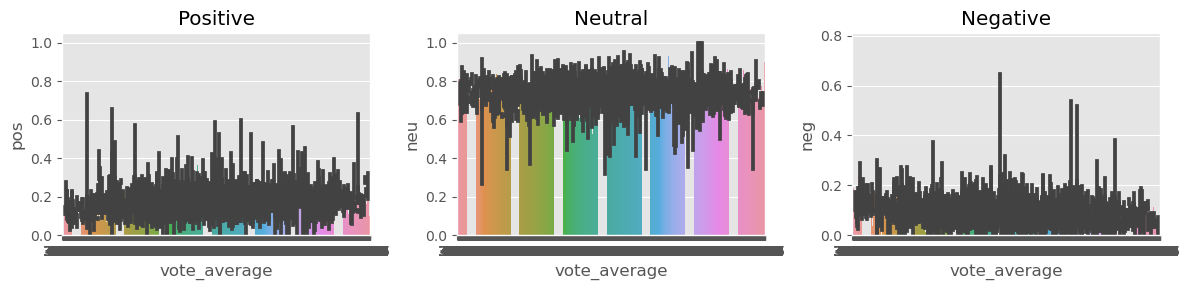

In [20]:
fig, axs = plt.subplots(1, 3, figsize=(12, 3))
sns.barplot(data=vaders, x='vote_average', y='pos', ax=axs[0])
sns.barplot(data=vaders, x='vote_average', y='neu', ax=axs[1])
sns.barplot(data=vaders, x='vote_average', y='neg', ax=axs[2])
axs[0].set_title('Positive')
axs[1].set_title('Neutral')
axs[2].set_title('Negative')
plt.tight_layout()
plt.show()

## Under Construction:

In [ ]:
from transformers import AutoTokenizer
from transformers import AutoModelForSequenceClassification
from scipy.special import softmax